In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, RocCurveDisplay, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.inspection import partial_dependence

In [2]:
water = pd.read_csv('~/Documents/metis/classification/project/water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
X = water[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = water['Potability']
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


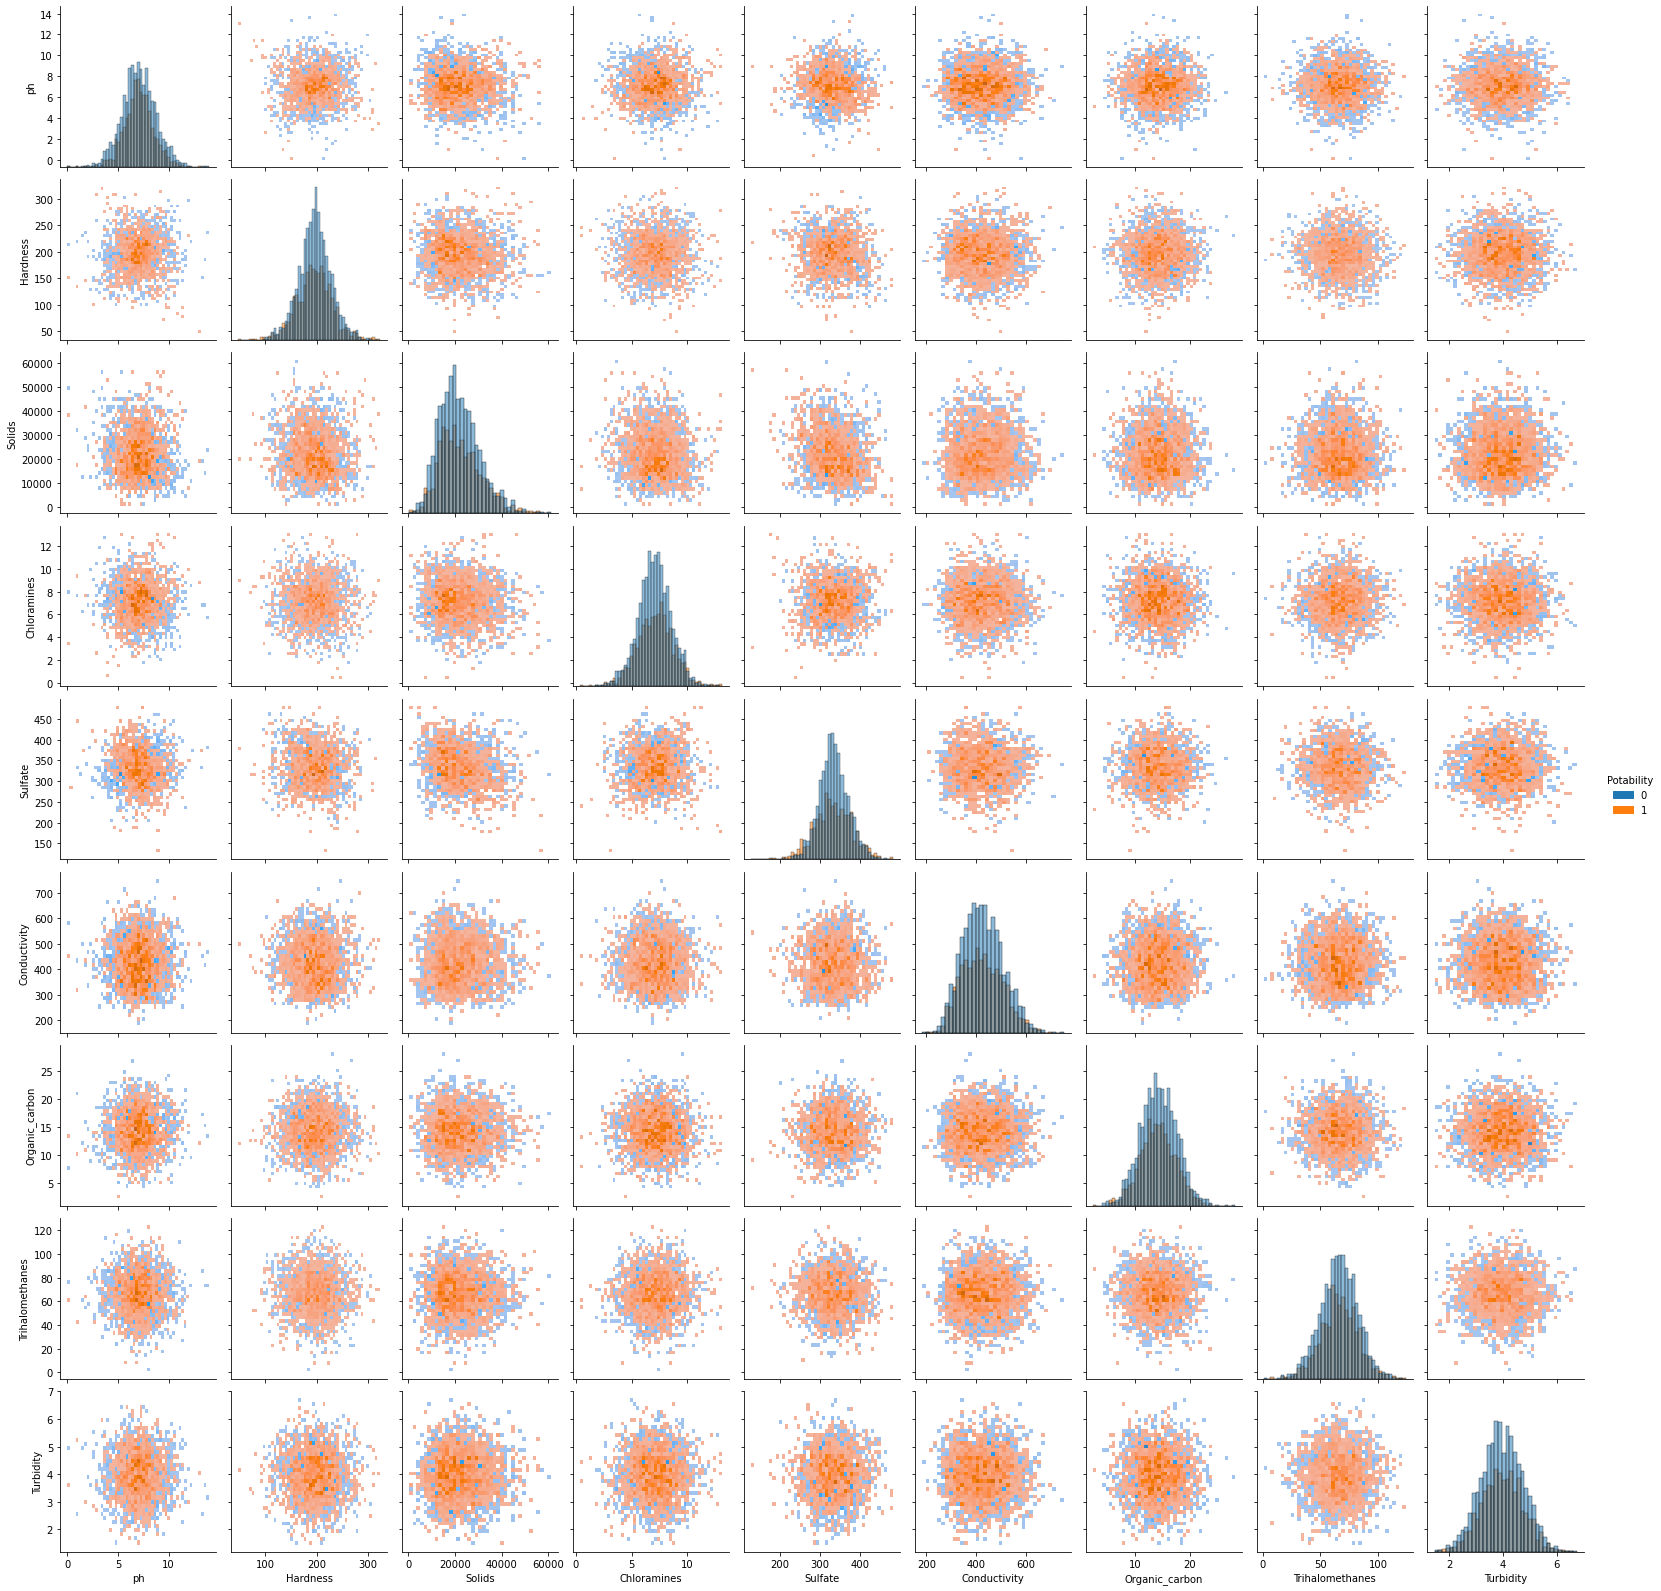

In [4]:
sns.pairplot(water,hue='Potability',kind='hist')

lots of overlap on the various metrics means we won't get any one breakout winner

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,0.259195,-0.139471,0.112415,0.838973,1.708954,-1.180651,1.273445,-1.286298
1,-2.110818,-2.036414,-0.385987,-0.307694,NaN,2.062575,0.270597,-0.622493,0.684218
2,0.638838,0.847665,-0.240047,1.360594,NaN,-0.094032,0.781117,0.001472,-1.167365
3,0.775374,0.547651,0.000493,0.592008,0.558106,-0.778830,1.255134,2.098969,0.848412
4,1.261849,-0.464429,-0.460249,-0.363698,-0.570898,-0.343939,-0.824357,-2.126974,0.138786


In [679]:
X_train_w, X_test, y_train_w, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_w, y_train_w, test_size=0.25, random_state=1)
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
31,1.721856,-0.170735,-0.266470,-0.230431,NaN,0.329545,0.790308,-1.194276,-1.421717
1046,-0.217875,0.036294,0.617795,-0.686859,-0.720579,-0.352921,1.544615,-0.734929,-1.010918
912,0.748588,-0.017222,-0.447449,0.189423,0.763887,-0.705427,0.819722,NaN,-1.783197
508,1.466407,-0.691390,-1.509759,0.842725,0.592059,2.111336,0.755896,2.403857,0.817477
1941,0.393540,-0.224234,-0.747998,-1.310528,-0.266157,1.198434,0.545771,-0.563338,1.191700


In [681]:
X_train_imputed = X_train.copy()
X_train_w_imputed = X_train_w.copy()
X_val_imputed = X_val.copy()
X_test_imputed = X_test.copy()
for field in X_train_imputed.columns:
    X_test_imputed[field] = X_test_imputed[field].fillna(X_train_imputed[field].mean())
    X_val_imputed[field] = X_val_imputed[field].fillna(X_train_imputed[field].mean())
    X_train_w_imputed[field] = X_train_w_imputed[field].fillna(X_train_w_imputed[field].mean())
    X_train_imputed[field] = X_train_imputed[field].fillna(X_train_imputed[field].mean())

In [682]:
X_train_invalid = X_train.copy()
X_train_w_invalid = X_train_w.copy()
X_val_invalid = X_val.copy()
X_test_invalid = X_test.copy()
for field in X_train_imputed.columns:
    X_test_invalid[field] = X_test_invalid[field].fillna(-5)
    X_val_invalid[field] = X_val_invalid[field].fillna(-5)
    X_train_w_invalid[field] = X_train_w_invalid[field].fillna(-5)
    X_train_invalid[field] = X_train_invalid[field].fillna(-5)

## Logistic Regression 
### Score 0.5812
NaN converted to mean values

In [646]:
lr1 = LogisticRegression(penalty='none', class_weight={0:1,1:1.5})
lr1.fit(X_train_imputed, y_train)

y_pred_lr1 = lr1.predict(X_val_imputed)

# y_pred_lr1 = lr1.predict_proba(X_val_imputed)

lr1.score(X_val_imputed,y_val)

0.5312977099236641

In [647]:
print(recall_score(y_pred_lr1,y_val))
print(precision_score(y_pred_lr1,y_val))
print(f1_score(y_pred_lr1,y_val))

0.33497536945812806
0.2833333333333333
0.30699774266365687


Text(0.5, 1.0, 'Logistic Regression ROC curve')

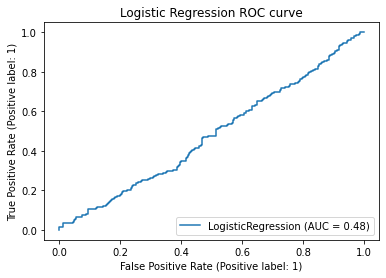

In [648]:
RocCurveDisplay.from_estimator(lr1, X_val_imputed, y_val)
plt.title('Logistic Regression ROC curve')

high recall score is good because all the potable water was returned, but very low precision means we marked too many bodies as potable when they were not. This would be a bad model we can return to tune hyperparameters.

## K Nearest Neighbors
### Score 0.6117
NaN converted to mean values

In [69]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_imputed, y_train)

y_pred_knn = knn.predict(X_val_imputed)

knn.score(X_val_imputed, y_val)

0.6641221374045801

In [71]:
print(recall_score(y_pred_knn,y_val))
print(precision_score(y_pred_knn,y_val))
print(f1_score(y_pred_knn,y_val))

0.6190476190476191
0.21666666666666667
0.32098765432098764


Text(0.5, 1.0, 'K Nearest Neighbors ROC curve')

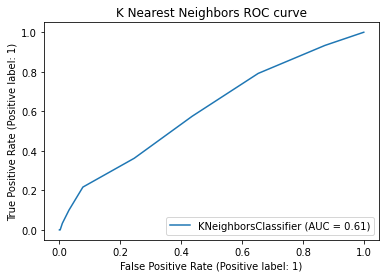

In [72]:
RocCurveDisplay.from_estimator(knn, X_val_imputed, y_val)
plt.title('K Nearest Neighbors ROC curve')

Much better precision score in this model, not enough to use without major improvements

## Simple Decision Tree
### Score 0.5702
NaN converted to -999

In [719]:
dtree = DecisionTreeClassifier(max_depth=4,min_samples_leaf=50,max_features=0.7,class_weight={0:1,1:3})
dtree.fit(X_train_invalid, y_train)

y_pred_tree = dtree.predict(X_val_invalid)

dtree.score(X_val_invalid,y_val)

0.3786259541984733

In [720]:
print(recall_score(y_pred_tree,y_val))
print(precision_score(y_pred_tree,y_val))
print(f1_score(y_pred_tree,y_val))

0.36891679748822603
0.9791666666666666
0.5359179019384264


In [721]:
print(dtree.feature_importances_)

[0.29356502 0.37488726 0.         0.         0.33154772 0.
 0.         0.         0.        ]


Text(0.5, 1.0, 'Decision Tree ROC curve')

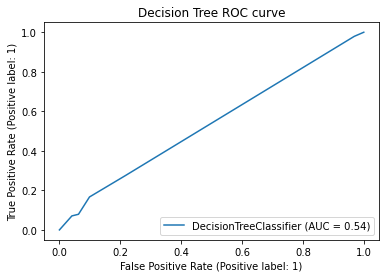

In [722]:
RocCurveDisplay.from_estimator(dtree, X_val_imputed, y_val)
plt.title('Decision Tree ROC curve')

More improvement to precision score, using more advanced decision trees may provide an even better precision

## Extra Tree (Extremely Random)
### Score 0.5433
NaN converted to -999

In [264]:
etree = ExtraTreeClassifier(max_depth=100, max_features=0.6, class_weight={0:1,1:7})
etree.fit(X_train_invalid, y_train)

y_pred_etree = etree.predict(X_val_invalid)

etree.score(X_val_invalid,y_val)

0.5908396946564886

In [265]:
print(recall_score(y_pred_etree,y_val))
print(precision_score(y_pred_etree,y_val))
print(f1_score(y_pred_etree,y_val))

0.4369369369369369
0.4041666666666667
0.4199134199134199


In [696]:
print(etree.feature_importances_)

[0.11058913 0.09612355 0.1358533  0.13169501 0.09416586 0.13505297
 0.10108264 0.10398715 0.09145039]


Text(0.5, 1.0, 'Extra Tree ROC curve')

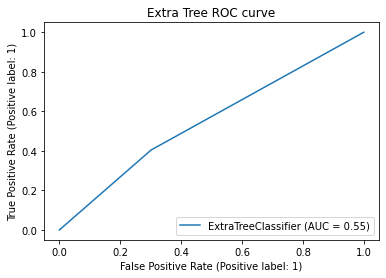

In [266]:
RocCurveDisplay.from_estimator(etree, X_val_invalid, y_val)
plt.title('Extra Tree ROC curve')

The extremely random tree has a lower score, perhaps running the model with samples can produce a better result

## Random Forest
### Score 0.6507
NaN converted to -999

In [660]:
rforest = RandomForestClassifier(n_estimators=150, max_depth=9, class_weight={0:2,1:3})
rforest.fit(X_train_invalid, y_train)

# y_pred_rforest = rforest.predict(X_val_invalid)
y_pred_rforest = rforest.predict_proba(X_val_invalid)[:,1]>=0.3

rforest.score(X_val_invalid,y_val)

0.665648854961832

In [661]:
print(recall_score(y_pred_rforest,y_val))
print(precision_score(y_pred_rforest,y_val))
print(f1_score(y_pred_rforest,y_val))

0.3792
0.9875
0.5479768786127168


Text(0.5, 1.0, 'Random Forest ROC curve')

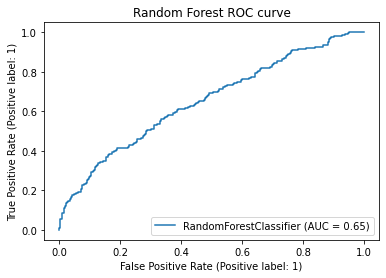

In [662]:
RocCurveDisplay.from_estimator(rforest, X_val_invalid, y_val)
plt.title('Random Forest ROC curve')

Low precision score but a good recall means we could tune hyper parameters to favor precision without sacrificing too much

## Bagging Classifier
### Score 0.6324
Nan converted to -999

In [395]:
bag = BaggingClassifier(n_estimators=50, max_samples=0.8)
bag.fit(X_train_invalid, y_train)

y_pred_bag = bag.predict(X_val_invalid)

bag.score(X_val_invalid,y_val)

0.6702290076335878

In [396]:
print(recall_score(y_pred_bag,y_val))
print(precision_score(y_pred_bag,y_val))
print(f1_score(y_pred_bag,y_val))

0.5869565217391305
0.3375
0.4285714285714286


Text(0.5, 1.0, 'Bagging Classifier ROC curve')

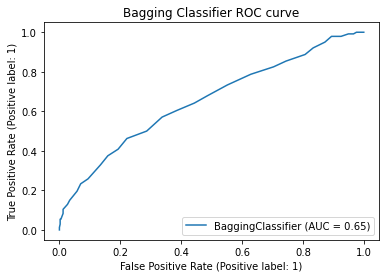

In [397]:
RocCurveDisplay.from_estimator(bag, X_val_imputed, y_val)
plt.title('Bagging Classifier ROC curve')

similar results to the random forest, this is another candidate for hyper parameter tuning

## Extra Trees Classifier
### Score 0.6166
NaN converted to -999

In [480]:
etrees = ExtraTreesClassifier(n_estimators=500,max_depth=12)
etrees.fit(X_train_invalid, y_train)

y_pred_etrees = etrees.predict(X_val_invalid)

etrees.score(X_val_invalid,y_val)

0.6366412213740458

In [481]:
print(recall_score(y_pred_etrees,y_val))
print(precision_score(y_pred_etrees,y_val))
print(f1_score(y_pred_etrees,y_val))

0.5384615384615384
0.058333333333333334
0.10526315789473684


In [693]:
print(etrees.feature_importances_)

[0.09574036 0.13415419 0.12008543 0.13207241 0.10103591 0.10432699
 0.11658798 0.09568243 0.1003143 ]


Text(0.5, 1.0, 'Extra Trees ROC curve')

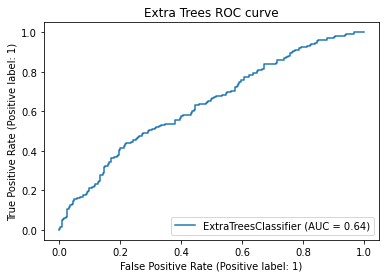

In [482]:
RocCurveDisplay.from_estimator(etrees, X_val_imputed, y_val)
plt.title('Extra Trees ROC curve')

Extra Trees (forest?) has a slightly better performance than the singular Extra Tree algorithm

## XGBoost
### Score 0.668
NaN converted to -999

In [30]:
import xgboost as xgb

In [566]:
gbm = xgb.XGBClassifier( 
                        n_estimators=150,
                        max_depth=5,
                        objective='binary:logistic', #new objective
                        learning_rate=.02, 
                        subsample=.15,
                        min_child_weight=3,
                        colsample_bytree=0.8,
                        eval_metric='error',
                        early_stopping_rounds=50
                       )

eval_set=[(X_train_invalid,y_train),(X_val_invalid,y_val)]
fit_model = gbm.fit( 
                    X_train_invalid, y_train, 
                    eval_set=eval_set,
                    verbose=False
                   )

print(accuracy_score(y_val, gbm.predict(X_val_invalid)))

# y_pred_xgboost = gbm.predict(X_val_invalid)

y_pred_xgboost = gbm.predict_proba(X_val_invalid)[:,1]>=0.4


0.6717557251908397


In [567]:
print(recall_score(y_pred_xgboost,y_val))
print(precision_score(y_pred_xgboost,y_val))
print(f1_score(y_pred_xgboost,y_val))

0.4022727272727273
0.7375
0.5205882352941176


Text(0.5, 1.0, 'XGBoost ROC curve')

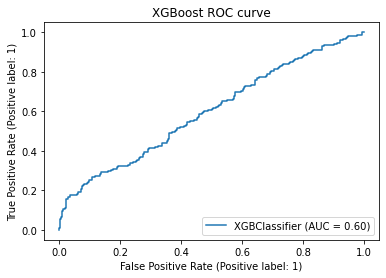

In [568]:
RocCurveDisplay.from_estimator(gbm, X_val_imputed, y_val)
plt.title('XGBoost ROC curve')

In [35]:
model_dict = {'Logistic Regression':[lr1,X_val_imputed],
              'K Nearest Neighbors':[knn,X_val_imputed],
              'Decision Tree':[dtree,X_val_invalid],
              'Extra Tree':[etree,X_val_invalid],
              'Random Forest':[rforest,X_val_invalid],
              'Bagging':[bag,X_val_invalid],
              'Extra Trees':[etrees,X_val_invalid],
              'XGBoost':[gbm,X_val_invalid]
             }

In [37]:
st.write("""
# Model Water Source Predictions

This app helps identify which models show success and allows hyperparamter tuning
""")

2022-09-06 09:42:07.166 
  command:

    streamlit run /Users/bill/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [40]:
model_dict = pd.DataFrame([['Logistic Regression',lr1,X_val_imputed],
              ['K Nearest Neighbors',knn,X_val_imputed],
              ['Decision Tree',dtree,X_val_invalid],
              ['Extra Tree',etree,X_val_invalid],
              ['Random Forest',rforest,X_val_invalid],
              ['Bagging',bag,X_val_invalid],
              ['Extra Trees',etrees,X_val_invalid],
              ['XGBoost',gbm,X_val_invalid]]
             )
print(model_dict)

                     0                                                  1  \
0  Logistic Regression                 LogisticRegression(penalty='none')   
1  K Nearest Neighbors                             KNeighborsClassifier()   
2        Decision Tree                           DecisionTreeClassifier()   
3           Extra Tree                              ExtraTreeClassifier()   
4        Random Forest  (DecisionTreeClassifier(max_features='auto', r...   
5              Bagging  (DecisionTreeClassifier(random_state=634408074...   
6          Extra Trees  (ExtraTreeClassifier(random_state=1037042004),...   
7              XGBoost  XGBClassifier(base_score=0.5, booster='gbtree'...   

                                                   2  
0              ph  Hardness    Solids  Chloramine...  
1              ph  Hardness    Solids  Chloramine...  
2                ph  Hardness    Solids  Chlorami...  
3                ph  Hardness    Solids  Chlorami...  
4                ph  Hardness  

In [692]:
gbm = xgb.XGBClassifier( 
                        n_estimators=150,
                        max_depth=5,
                        objective='binary:logistic', #new objective
                        learning_rate=.02, 
                        subsample=.15,
                        min_child_weight=3,
                        colsample_bytree=0.8,
                        eval_metric='error',
                        early_stopping_rounds=50
                       )

eval_set=[(X_train_w_invalid,y_train_w),(X_test_invalid,y_test)]
fit_model = gbm.fit( 
                    X_train_w, y_train_w, 
                    eval_set=eval_set,
                    verbose=False
                   )

print(accuracy_score(y_test, gbm.predict(X_test_invalid)))
print(roc_auc_score(y_test, gbm.predict(X_test_invalid)))
print(gbm.feature_importances_)

0.6128048780487805
0.5725518430451217
[0.11543989 0.10925622 0.12148444 0.10179311 0.1365447  0.0978878
 0.09744468 0.11015841 0.10999078]


In [691]:
rforest = RandomForestClassifier(n_estimators=150, max_depth=9, class_weight={0:2,1:3})
rforest.fit(X_train_w_invalid, y_train_w)

# y_pred_rforest = rforest.predict(X_val_invalid)
y_pred_rforest = rforest.predict_proba(X_test_invalid)[:,1]>=0.5

print(rforest.score(X_test_invalid,y_test))
print(roc_auc_score(y_test, rforest.predict(X_test_invalid)))
print(rforest.feature_importances_)

0.6417682926829268
0.6069733513959019
[0.15150756 0.12298938 0.11883266 0.12213359 0.12802063 0.09218593
 0.0915268  0.087573   0.08523044]


In [724]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_w_imputed, y_train_w)

y_pred_knn = knn.predict(X_test_imputed)

knn.score(X_test_imputed, y_test)

0.6082317073170732

In [726]:
print(knn.score(X_test_imputed,y_test))
print(roc_auc_score(y_test, knn.predict(X_test_imputed)))

0.6082317073170732
0.5625621690239583


Text(0.5, 1.0, 'K Nearest Neighbors ROC curve')

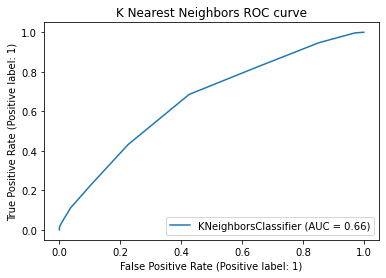

In [729]:
RocCurveDisplay.from_estimator(knn, X_test_imputed, y_test)
plt.title('K Nearest Neighbors ROC curve')